# 베르누이 분포(Bernoulli Distribution)
  베르누이 분포는 두 가지 결과(성공/실패, 참/거짓, 1/0) 중 하나가 발생하는 확률 분포

1. 베르누이 분포는 단일 시행에 대한 확률 분포입니다.
2. 여러 개의 독립적인 베르누이 시행을 반복하면 이항 분포(Binomial Distribution)가 됩니다.
3. 베르누이 분포는 평균이 p이므로, 확률 p가 크면 1에 가깝고, 작으면 0에 가깝습니다.

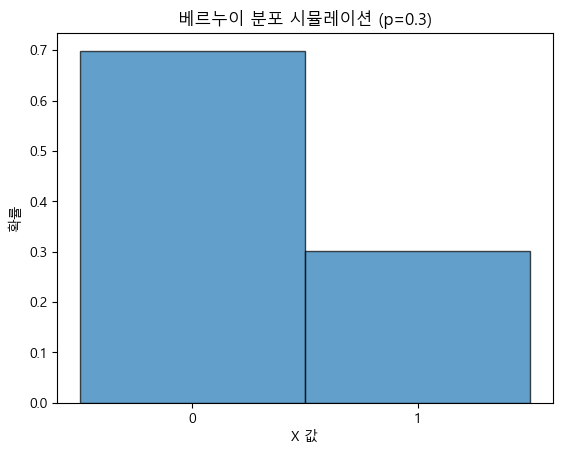

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import matplotlib

# 한글 폰트 설정
matplotlib.rc('font', family='Malgun Gothic')  # 윈도우 사용자의 경우
# matplotlib.rc('font', family='AppleGothic')  # 맥 사용자의 경우

# 음수 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 베르누이 분포 (p=0.3)
p = 0.3
X = bernoulli.rvs(p, size=1000)  # 1000개의 샘플 생성

# 결과 시각화
plt.hist(X, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7, density=True)
plt.xticks([0, 1])
plt.xlabel('X 값')
plt.ylabel('확률')
plt.title('베르누이 분포 시뮬레이션 (p=0.3)')

plt.show()

베르누이 분포와 시그모이드 함수의 관계
 - 베르누이 분포와 시그모이드(sigmoid) 함수는 확률 모델링과 이진 분류(Binary Classification)에서 중요한 역할을 합니다. 특히 로지스틱 회귀(Logistic Regression) 및 신경망(Neural Networks)에서 베르누이 분포는 시그모이드 함수를 통해 확률을 모델링하는 데 사용됩니다.
 - 시그모이드 함수는 z값을 입력 받아 0과 1 사이의 값을 출력합니다. 즉, 확률처럼 해석할 수 있습니다.

→ 시그모이드 함수는 베르누이 분포의 성공 확률 p를 결정하는 함수로 사용될 수 있습니다.

정리
 - 베르누이 분포는 확률 p에 따라 0 또는 1을 출력하는 이산 확률 분포.
 - 시그모이드 함수는 입력 z를 확률값 p로 변환하는 역할.
 - 로지스틱 회귀 및 신경망에서 베르누이 분포와 시그모이드 함수가 결합되어 확률 기반 분류를 수행.
 - 크로스 엔트로피 손실 함수를 통해 최적화.
   - 크로스 엔트로피 손실 함수: 베르누이 분포의 우도 함수(likelihood function)에서 유도된 로그 우도(log-likelihood)의 음수 형태

추가 설명
 - 우도 함수(likelihood): 주어진 데이터가 특정 확률 분포를 따를 확률. 즉, 모델이 데이터를 잘 설명할 확률
 - 로그 우도(log-likelihood): 계산을 편하게 하기 위해 log를 씌운 것
   - 우도 함수를 직접 계산하는 것은 곱셈이 많아 복잡하고, 특히 확률값이 작을 때 매우 작아지는 문제 발생
   - 이를 해결하기 위해 로그(log)를 취한 로그 우도 함수(log-likelihood function)를 사용
 - 크로스 엔트로피 손실: 로그 우도를 최소화(= 음수 로그 우도를 최대화)하려고 한 것
   - 음수를 취하는 이유는 최적화 과정에서 최대화 보다는 최소화가 더 익숙하기 때문
   - 머신러닝에서 손실 함수는 작을수록 좋기 때문에 로그 우도를 최대화하는 대신 그 음수를 최소화 하는 방식으로 변형

로그 우도 함수는 모델이 데이터 xi를 얼마나 잘 설명하는지를 나타냅니다. 머신러닝에서 최적의 p를 찾는 문제
로 변환하면, 로그 우도 함수를 최대화하는 p를 찾으면 됩니다.

💡 즉, 우리가 데이터를 보고 가장 가능성이 높은 확률 p를 찾는 것이 목표
 - 로지스틱 회귀에서 이 로그 우도 함수를 크로스 엔트로피 손실 함수(Binary Cross-Entropy Loss)로 변형하여
최적화 문제로 변환합니다.
 - 최적의 p를 찾기 위해 경사 하강법(Gradient Descent) 등의 최적화 기법을 사용합니다.

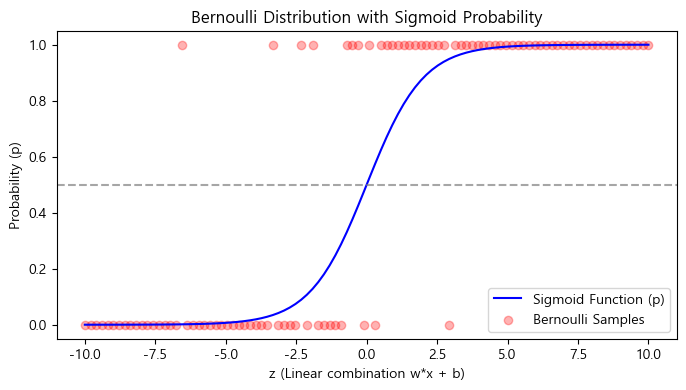

In [ ]:
# 베르누이 분포와 시그모이드 함수를 연결
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 입력값 z 생성
z = np.linspace(-10, 10, 100)
p = sigmoid(z) # 확률 p 계산

# 베르누이 분포에서 샘플 생성
samples = bernoulli.rvs(p, size=len(z))

# 그래프 그리기
plt.figure(figsize=(8,4))
plt.plot(z, p, label="Sigmoid Function (p)", color='blue')
plt.scatter(z, samples, color='red', alpha=0.3, label="Bernoulli Samples")
plt.axhline(0.5, linestyle="dashed", color="gray", alpha=0.7)
plt.xlabel("z (Linear combination w*x + b)")
plt.ylabel("Probability (p)")
plt.legend()
plt.title("Bernoulli Distribution with Sigmoid Probability")
plt.show()

결과
 - 파란 선: 시그모이드 함수에 의해 생성된 확률 .
 - 빨간 점: 베르누이 분포에서 샘플링된 결과(0 또는 1).

결론
1. 베르누이 분포는 확률적 이진 결과를 모델링하고, 그 확률을 결정하는 데 시그모이드 함수가 사용될 수 있음.
2. 로지스틱 회귀는 베르누이 분포 기반의 분류 모델로, 확률을 시그모이드 함수로 변환하여 예측.
3. 크로스 엔트로피 손실 함수는 베르누이 분포 기반 최적화에 사용됨.

즉, 베르누이 분포와 시그모이드 함수는 확률 기반 머신러닝 모델에서 필수적으로 사용되는 개념입니다.

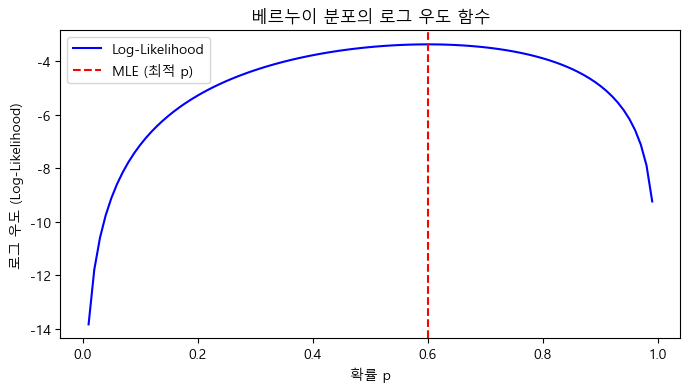

In [39]:
# 베르누이 분포에서의 로그 우도 함수 시각화
import numpy as np
import matplotlib.pyplot as plt

# 데이터 샘플 (1: 구매, 0: 미구매)
X = np.array([1, 0, 1, 1, 0])
n = len(X)

# 가능한 확률 p의 범위 (0~1)
p_values = np.linspace(0.01, 0.99, 100)

# 로그 우도 함수 계산
log_likelihoods = [np.sum(X * np.log(p) + (1 - X) * np.log(1 - p)) for p in p_values]

# 그래프 시각화
plt.figure(figsize=(8, 4))
plt.plot(p_values, log_likelihoods, label="Log-Likelihood", color='blue')
plt.axvline(X.mean(), linestyle="dashed", color="red", label="MLE (최적 p)")
plt.xlabel("확률 p")
plt.ylabel("로그 우도 (Log-Likelihood)")
plt.title("베르누이 분포의 로그 우도 함수")
plt.legend()
plt.show()

결과 해석
 - 그래프에서 최댓값을 가지는 p가 최적의 확률(MLE, Maximum Likelihood Estimation)이 됩니다.
 - 즉, p가 X의 평균값(데이터의 비율)과 일치하는 경우 최대가 됩니다.

요약 및 핵심 정리

 ✅ 우도 함수(Likelihood Function): 주어진 데이터가 발생할 확률을 나타냄 → 확률을 곱한 식으로 표현됨.
 
 ✅ 로그 우도 함수(Log-Likelihood Function):    우도 함수에 로그를 취한 것 → 곱셈을 덧셈으로 변환하여 계산을 쉽게 함.
 
 ✅ 로그 우도 함수의 최댓값을 찾는 것이 MLE(최대우도추정, Maximum Likelihood Estimation)
   
   - 이 값이 로지스틱 회귀와 크로스 엔트로피 손실 함수로 이어짐.
 
 ✅ Python 코드로 시각화하면 로그 우도 함수가 최대가 되는 p를 찾을 수 있음.

💡 결론: 베르누이 분포에서의 로그 우도 함수는 확률 모델을 최적화하는 핵심 개념이며, 머신러닝에서 크로스 엔트로피
손실 함수로 연결됩니다.

# 제조 공정에서의 베르누이 분포 적용

공장에서 샘플링한 데이터를 바탕으로 불량률을 추정하려면 로그 우도 함수(Log-Likelihood Function)를 활용할 수
있습니다.

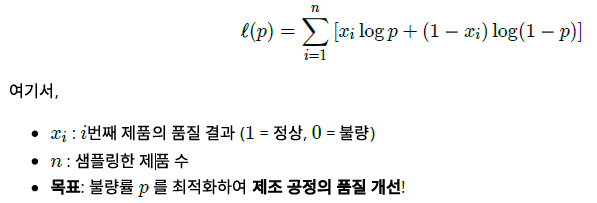

시간에 따라 불량률이 증가하는지 모니터링하려면 이전 기간과 비교하여 로그 우도 함수의 변화 추이를 분석합니다.
 - 만약 불량률이 점점 높아지면 공정에 이상이 발생했을 가능성이 큼.
 - 로그 우도 함수를 이용해 제조 조건(온도, 압력, 속도 등)을 최적화할 수 있음.

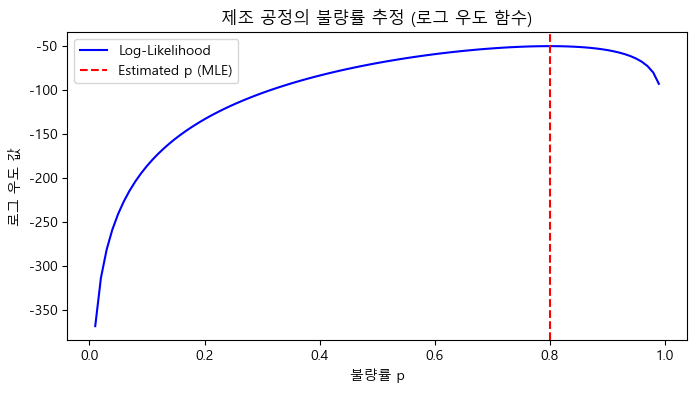

In [10]:
# 실시간 불량률 모니터링
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 (최근 100개 제품 검사)
X = np.random.choice([1, 0], size=100, p=[0.9, 0.1]) # 정상(90%), 불량(10%)

# 가능한 불량 확률(p)의 범위
p_values = np.linspace(0.01, 0.99, 100)

# 로그 우도 함수 계산
log_likelihoods = [np.sum(X * np.log(p) + (1 - X) * np.log(1 - p)) for p in p_values]

# 그래프 시각화
plt.figure(figsize=(8, 4))
plt.plot(p_values, log_likelihoods, label="Log-Likelihood", color='blue')
plt.axvline(np.mean(X), linestyle="dashed", color="red", label="Estimated p (MLE)")
plt.xlabel("불량률 p")
plt.ylabel("로그 우도 값")
plt.title("제조 공정의 불량률 추정 (로그 우도 함수)")
plt.legend()
plt.show()

이 그래프는 **제조 공정의 불량률 \( p \)** 에 대해 **로그 우도 함수 (log-likelihood)** 를 나타낸 것입니다. 이를 통해 최적의 \( p \) 값을 추정하려는 상황으로 보입니다. 아래에 그래프를 해석해 드릴게요.

---

### 1. 그래프 구성 요소
- **X축 (불량률 \( p \))**: 제조 공정에서의 불량률을 나타냅니다. \( p \) 값은 0부터 1까지의 범위로 설정되어 있습니다.
- **Y축 (로그 우도 값)**: \( p \) 값에 대한 로그 우도 함수의 값입니다. \( p \) 가 특정 값일 때, 데이터에 얼마나 적합한지를 나타냅니다.
- **파란 선 (Log-Likelihood)**: \( p \) 값에 따라 계산된 로그 우도 값입니다. 곡선의 모양은 \( p \) 값이 특정 값에 가까워질수록 로그 우도가 최대화됨을 보여줍니다.
- **빨간 점선 (Estimated \( p \))**: 로그 우도가 최대화되는 지점 (즉, 우도 함수가 최대가 되는 지점)에서의 \( p \) 값입니다. 이 값이 **최대우도추정치 (MLE, Maximum Likelihood Estimation)** 입니다.

---

### 2. 그래프의 의미
- **로그 우도의 의미**: 로그 우도는 모델의 적합도를 나타내는 척도입니다. 로그 우도가 높을수록, 해당 \( p \) 값이 데이터에 더 잘 맞는다는 것을 의미합니다.
- **최적의 \( p \) 값**: 빨간 점선이 나타내는 \( p \) 값이 로그 우도가 최대가 되는 지점입니다. 이는 데이터로부터 추정한 불량률의 최적 추정치 (MLE) 입니다.

---

### 3. 제조 공정의 불량률 추정
이 그래프에 따르면:
- 로그 우도는 \( p \) 값이 약 **0.8** 근처에서 최대화되고 있습니다. 이는 데이터로부터 추정된 제조 공정의 불량률이 약 **80%** 라는 것을 의미합니다.
- \( p \) 값이 0.8보다 작거나 크면 로그 우도가 감소하므로, 그 값들은 데이터에 적합하지 않다고 볼 수 있습니다.

---

결론적으로, 이 그래프는 **최대우도추정(MLE)** 을 사용해 제조 공정의 불량률 \( p \) 를 약 **80%** 로 추정한 결과를 시각화한 것입니다.

결론

✅ 베르누이 분포를 활용하여 제조 공정의 품질 데이터를 모델링

✅ 로그 우도 함수를 이용해 불량률을 최적 추정하고 품질 개선

✅ 실시간으로 불량률 변화를 모니터링하고 이상 감지

✅ Python으로 데이터 분석 및 품질 최적화를 자동화

제조 공정에서 베르누이 분포 기반 불량률 예측 모델의 신뢰성을 높이는 방법

1. 데이터 수집 개선(Data Collection Improvement)

① 샘플 크기 증가
 - 신뢰도 높은 불량률 추정을 위해 더 많은 데이터 샘플이 필요합니다.
 - 샘플 수 n이 클수록 베르누이 분포의 추정이 정밀해짐(대수의 법칙).

✅ 방법:
 - 일일/주간 샘플 수를 늘려 통계적으로 유의미한 결과 확보.
 - 특정 공정 조건(온도, 압력, 속도 등)에서 각각의 데이터 확보.

② 대표성 있는 샘플링
 - 공정 조건이 다른 경우, 모든 조건에서 골고루 데이터 샘플링.
 - 특정 기계, 시간대, 작업자에 따라 불량률이 다를 수 있으므로 편향 없는 데이터 수집 필요.

✅ 방법:
랜덤 샘플링 또는 각 공정별 계층적 샘플링(Stratified Sampling) 적용.

2. 통계적 보정 및 신뢰 구간 활용

① 불량률의 신뢰 구간 계산
 - 베르누이 분포 기반 불량률 추정은 변동성이 크므로 신뢰 구간(confidence interval, CI)을 제공하면 신뢰성을 높일
수 있습니다.

✅ 방법: 신뢰 구간을 계산하여 불량률의 오차 범위를 명확히 제공.

In [11]:
import scipy.stats as st
# 데이터
n = 100 # 샘플 개수
x = 10 # 불량 개수
p_hat = x / n # 추정 불량률

# 95% 신뢰 구간
ci_low, ci_high = st.norm.interval(0.95, loc=p_hat, scale=(p_hat * (1 - p_hat) / n) ** 0.5)
print(f"불량률 추정값: {p_hat:.3f}, 95% 신뢰 구간: ({ci_low:.3f}, {ci_high:.3f})")

불량률 추정값: 0.100, 95% 신뢰 구간: (0.041, 0.159)


3. 이상 감지 및 공정 최적화

① SPC(Statistical Process Control) 활용
 - 과거 데이터와 비교하여 공정 이상 여부를 감지.
 - X-bar 관리도(평균 값 변동)나 P-chart(불량률 관리도)를 활용.

✅ 방법: 이상 감지를 위해 관리 한계선(Control Limit)을 설정.

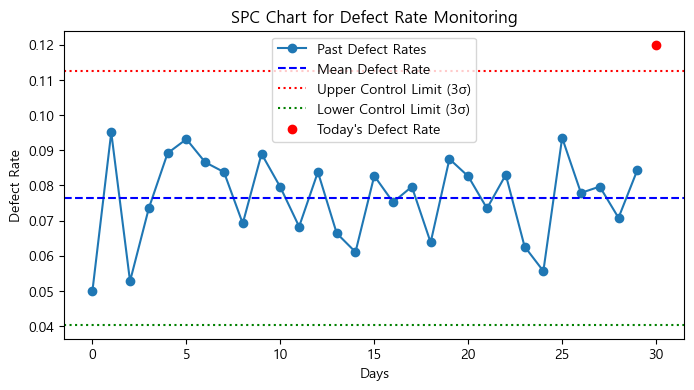

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 과거 30일간 불량률 데이터
past_defect_rates = np.random.uniform(0.05, 0.1, size=30) # 5~10% 범위 내 변동
mean_defect = np.mean(past_defect_rates)
std_defect = np.std(past_defect_rates)

# 관리 한계선 (3-sigma)
upper_limit = mean_defect + 3 * std_defect
lower_limit = max(0, mean_defect - 3 * std_defect)

# 오늘 불량률
today_defect_rate = 0.12 # 예: 오늘 불량률 12%
plt.figure(figsize=(8, 4))
plt.plot(past_defect_rates, marker='o', label="Past Defect Rates")
plt.axhline(mean_defect, color='blue', linestyle="dashed", label="Mean Defect Rate")
plt.axhline(upper_limit, color='red', linestyle="dotted", label="Upper Control Limit (3σ)")
plt.axhline(lower_limit, color='green', linestyle="dotted", label="Lower Control Limit (3σ)")
plt.scatter(len(past_defect_rates), today_defect_rate, color='red', label="Today's Defect Rate", zorder=5)
plt.xlabel("Days")
plt.ylabel("Defect Rate")
plt.title("SPC Chart for Defect Rate Monitoring")
plt.legend()
plt.show()

4. 머신러닝 및 예측 모델 강화

① 로지스틱 회귀(Logistic Regression) 적용
 - 베르누이 분포 기반 확률 모델을 머신러닝 방식으로 확장 가능.
 - 시그모이드 함수로 불량 가능성을 예측하고, 불량 제품을 사전에 탐지.

✅ 방법: 공정 조건 (온도, 압력, 속도, 작업자 등) → 불량 예측 모델 적용.

In [ ]:
from sklearn.linear_model import LogisticRegression

# 샘플 데이터 (온도, 압력, 속도 → 불량 여부)
X_train = np.array([[30, 5, 100], [35, 4.8, 110], [40, 4.6, 120]]) # 제조 조건
y_train = np.array([0, 1, 0]) # 0=정상, 1=불량

# 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 새로운 조건에서 불량 확률 예측
new_condition = np.array([[38, 4.7, 115]])
predicted_prob = model.predict_proba(new_condition)[0, 1]
print(f"예측된 불량 확률: {predicted_prob:.2%}")

예측된 불량 확률: 33.33%


5. 실시간 모니터링 및 자동 경고 시스템

① 클라우드 기반 품질 관리
 - IoT 센서 → 실시간 데이터 수집 → 모델 예측 → 자동 경고
 - 제조 라인에 설치된 센서에서 온도, 진동, 압력 등의 데이터를 실시간 분석.

✅ 방법: 이상이 감지되면 자동으로 경고 시스템 알림.

In [ ]:
def check_defect_risk(defect_rate, threshold=0.1):
    if defect_rate > threshold:
        print("🚨 경고: 불량률이 관리 기준을 초과했습니다! 즉시 점검 필요!")
    else:
        print("✅ 정상 운영 중")

# 예제 실행
check_defect_risk(0.12)  # 불량률 12%

🚨 경고: 불량률이 관리 기준을 초과했습니다! 즉시 점검 필요!


📌 결론: 신뢰성 향상을 위한 주요 개선 사항

✅ 샘플 크기 증가: 더 많은 데이터를 확보하여 정확도 향상

✅ 신뢰 구간 추가: 불량률의 변동성을 고려한 정확한 분석

✅ SPC 활용: 제조 공정의 이상 감지 및 자동 경고 시스템 구축

✅ 로지스틱 회귀 도입: 머신러닝 기반으로 불량 가능성을 사전 예측

✅ 실시간 데이터 모니터링: IoT 및 클라우드 기반 자동 품질 관리

모니터링 시스템과 자동 보고서 생성 시스템 구축
 - 실시간으로 품질 관리를 수행하고, 경영진 및 관리자에게 자동으로 보고서를 제공할 수 있습니다.
 - [센서 데이터] → [데이터 저장] → [분석 & 예측] → [대시보드 시각화] → [자동 보고서 생성]

실시간 모니터링 코드

① 실시간 품질 데이터 수집 (시뮬레이션)
 - 제조 공정에서 실시간으로 불량률 데이터를 수집 코드

In [40]:
import time
import random
import pandas as pd

# 불량률 시뮬레이션 데이터 생성
def generate_quality_data():
    return {
        "timestamp": pd.Timestamp.now(),
        "temperature": round(random.uniform(30, 40), 2), # 온도 센서 데이터
        "pressure": round(random.uniform(4.5, 5.5), 2), # 압력 센서 데이터
        "speed": round(random.uniform(100, 120), 2), # 생산 속도
        "defect_rate": round(random.uniform(0.05, 0.12), 3) # 불량률
        }

# 실시간 데이터 수집 (10초마다 갱신)
for _ in range(5):
    quality_data = generate_quality_data()
print(quality_data)
time.sleep(10) # 10초 간격으로 데이터 수집

{'timestamp': Timestamp('2025-02-07 17:40:33.083340'), 'temperature': 30.41, 'pressure': 5.41, 'speed': 115.86, 'defect_rate': 0.103}


② 이상 감지 및 자동 알림 시스템
 - SPC 관리도를 활용하여 불량률이 설정된 한계값(예: 10%)을 초과하면 경고를 출력하는 시스템 구현 코드

In [30]:
def check_defect_risk(defect_rate, threshold=0.1):
    if defect_rate > threshold:
        print("🚨 경고: 불량률이 관리 기준을 초과했습니다! 즉시 점검 필요!")
    else:
        print("✅ 정상 운영 중")

# 예제 실행
check_defect_risk(0.12)  # 불량률 12%

🚨 경고: 불량률이 관리 기준을 초과했습니다! 즉시 점검 필요!


자동 보고서 생성 시스템
 - 자동 보고서를 Excel 및 PDF 형식으로 생성하여 경영진 및 관리자에게 자동으로 전달할 수 있습니다.

① Excel 보고서 자동 생성

In [33]:
import pandas as pd
# 샘플 데이터 생성
data = [generate_quality_data() for _ in range(10)] # 10개 데이터 생성
df = pd.DataFrame(data)

# 엑셀 파일로 저장
df.to_excel("quality_report.xlsx", index=False)
print("📊 품질 보고서 (Excel) 생성 완료!")

📊 품질 보고서 (Excel) 생성 완료!


② PDF 보고서 자동 생성

In [36]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import pandas as pd

# 품질 데이터 생성 함수 (예시)
def generate_quality_data():
    return {
        "ProductID": 1234,
        "DefectRate": 0.05,
        "InspectionDate": "2025-02-07"
    }

# PDF 보고서 생성 함수
def generate_pdf_report(filename="quality_report.pdf"):
    c = canvas.Canvas(filename, pagesize=letter)
    c.drawString(100, 750, "📌 제조 공정 품질 보고서")
    c.drawString(100, 730, f"날짜: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}")

    # 품질 데이터 삽입
    data = generate_quality_data()
    y_position = 700
    for key, value in data.items():
        c.drawString(100, y_position, f"{key}: {value}")
        y_position -= 20

    # PDF 저장
    c.save()
    print(f"📄 PDF 보고서 생성 완료: {filename}")

# PDF 보고서 생성 실행
generate_pdf_report()


📄 PDF 보고서 생성 완료: quality_report.pdf


자동 보고서 전송 (이메일)
 - 완성된 Excel/PDF 보고서를 자동으로 이메일로 전송하는 기능 추가

In [ ]:
import smtplib
from email.message import EmailMessage

# 이메일 전송 함수
def send_email_report():
    msg = EmailMessage()
    msg["Subject"] = "📊 제조 공정 품질 보고서"
    msg["From"] = "your_email@gmail.com"  # 발신자 이메일
    msg["To"] = "manager@example.com"  # 수신자 이메일
    msg.set_content("안녕하세요, 제조 공정 품질 보고서를 첨부합니다.")
    
    # 파일 첨부 (Excel & PDF)
    with open("quality_report.xlsx", "rb") as f:
        msg.add_attachment(
            f.read(),
            maintype="application",
            subtype="vnd.ms-excel",
            filename="quality_report.xlsx"
        )
    with open("quality_report.pdf", "rb") as f:
        msg.add_attachment(
            f.read(),
            maintype="application",
            subtype="pdf",
            filename="quality_report.pdf"
        )
    
    # SMTP 서버 연결 (Gmail 기준)
    try:
        with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
            server.login("your_email@gmail.com", "your_password")  # 보안 강화를 위해 앱 비밀번호 사용
            server.send_message(msg)
        print("📩 품질 보고서 이메일 전송 완료!")
    except Exception as e:
        print(f"이메일 전송 실패: {e}")

# 실행
send_email_report()


이메일 전송 실패: (535, b'5.7.8 Username and Password not accepted. For more information, go to\n5.7.8  https://support.google.com/mail/?p=BadCredentials d2e1a72fcca58-73048ad27afsm2397377b3a.43 - gsmtp')


📌 결론 및 기대 효과

✅ 제조 공정 실시간 모니터링

✅ 이상 감지 및 자동 알람 (불량률 급증 시 경고)

✅ Excel 및 PDF 보고서 자동 생성

✅ 경영진에게 이메일 보고서 자동 발송